In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

## Importing Segmentation Data

In [2]:
seg_data_file = pd.read_csv('segmentation data.csv')

In [3]:
seg_data = seg_data_file.copy()
seg_data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [4]:
seg_data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [5]:
seg_data.isnull().sum()


ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

## Correlation Estimate

Finding correlation so that consumers with similar categories can be grouped together -- essence of segmentation

In [6]:
seg_data.drop('ID',axis=1,inplace = True)  #because id is not considered as feature

In [7]:
#np.savetxt('seg_data.csv',seg_data)

seg_data.to_csv('seg_data.csv',index = False,index_label=False)

In [8]:
corr1 = seg_data.corr()
corr1.to_csv('Correlation_Estimate.csv')
seg_data.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


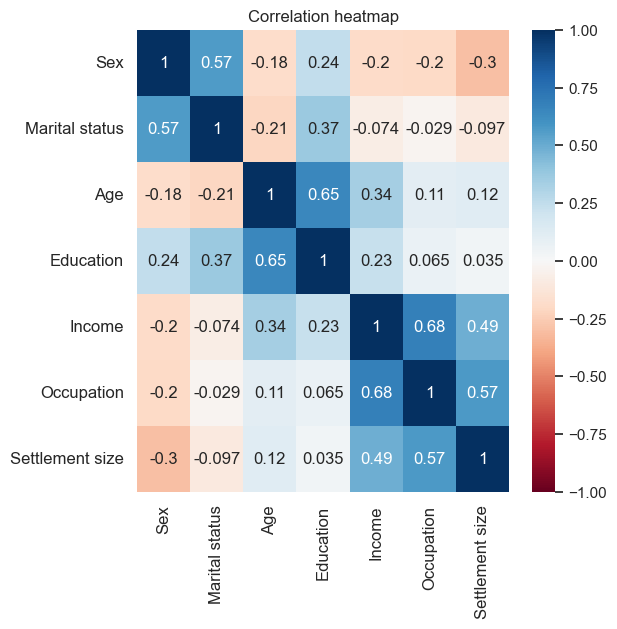

In [9]:
plt.figure(figsize=(6,6))
s =sns.heatmap(seg_data.corr(),
            annot = True,
            cmap='RdBu',
            vmin=-1,
            vmax=1)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
plt.title('Correlation heatmap')
#plt.savefig('Correlation heatmap',format = 'png',pad_inches=0.3)
plt.savefig("Correlation heatmap", facecolor='#E6E6FA', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()


## Visualizing the Raw Data

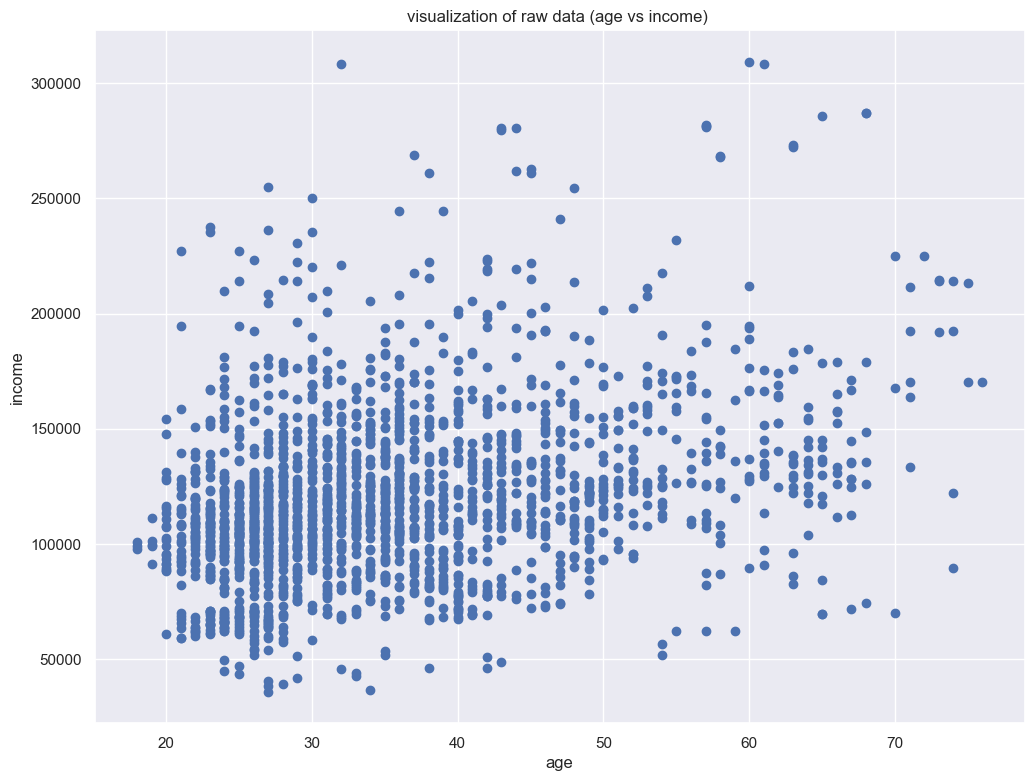

In [10]:
plt.figure(figsize = (12,9))
plt.scatter(seg_data.iloc[:,2],seg_data.iloc[:,4])
plt.xlabel('age')
plt.ylabel('income')
plt.title('visualization of raw data (age vs income) ')
plt.show()

In [11]:
# Standardization

In [12]:
scaler = StandardScaler()
seg_data_standard = scaler.fit_transform(seg_data)

In [13]:
seg_data_standard

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

## Hierarchial Clustering

In [14]:
hier_clust = linkage(seg_data_standard, method = 'ward')

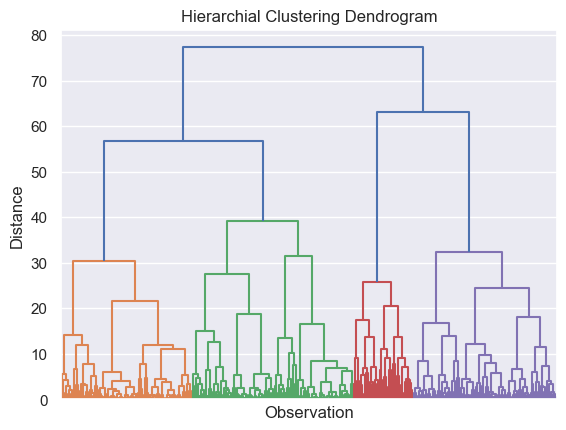

In [15]:
plt.figure()
plt.title('Hierarchial Clustering Dendrogram')
plt.xlabel('Observation')
plt.ylabel('Distance')
dendrogram(hier_clust,
           show_leaf_counts = False,
           no_labels= True,
           
          )
plt.show()


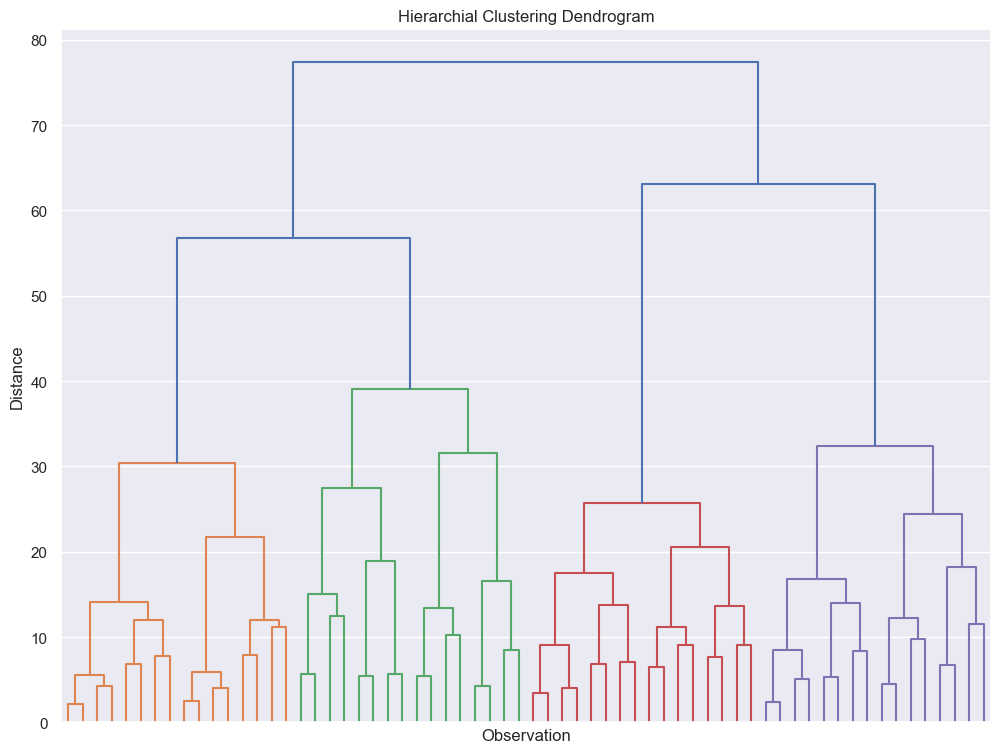

In [16]:
plt.figure(figsize = (12,9))
plt.title('Hierarchial Clustering Dendrogram')
plt.xlabel('Observation')
plt.ylabel('Distance')
dendrogram(hier_clust,
           show_leaf_counts = False,
           no_labels= True,
           truncate_mode = 'level',
           p=5
          )
plt.savefig("Hierarchial Clustering Dendrogram", facecolor='#E6E6FA', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()


In [17]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state =32)
    kmeans.fit(seg_data_standard)
    wcss.append(kmeans.inertia_)

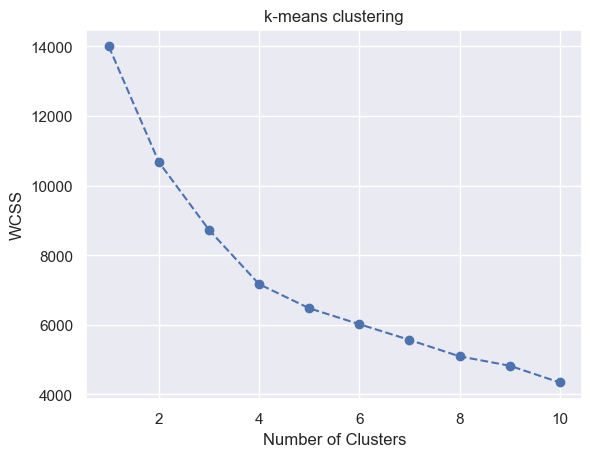

In [18]:
#plt.figure(figsize = (12,9))
plt.plot(range(1,11),wcss,marker = 'o',linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('k-means clustering')
plt.savefig("k-means clustering", facecolor='#E6E6FA', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

Using elbow method or WCSS method : Number of Clusters  = 4

In [19]:
kmeans = KMeans(n_clusters = 4,init ='k-means++',random_state =32)
kmeans.fit(seg_data_standard)


KMeans(n_clusters=4, random_state=32)

## Results


In [20]:
seg_data_kmeans = seg_data.copy()
seg_data_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [21]:
seg_data_kmeans['Segment_KMeans'] = kmeans.labels_

In [22]:
seg_data_analysis = seg_data_kmeans.groupby(['Segment_KMeans']).mean()
seg_data_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment_KMeans,,,,,,,
0,0.351410,0.019523,35.542299,0.744035,97802.724512,0.329718,0.043384
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061


In [23]:
seg_data_analysis['n_obs'] = seg_data_kmeans.groupby(['Segment_KMeans'])['Sex'].count()

In [24]:
seg_data_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,n_obs
Segment_KMeans,,,,,,,,
0,0.351410,0.019523,35.542299,0.744035,97802.724512,0.329718,0.043384,461
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570
3,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,264


In [25]:
seg_data_analysis['n_prop'] = seg_data_analysis['n_obs']/seg_data_analysis['n_obs'].sum()

In [26]:
seg_data_analysis = seg_data_analysis.rename({0:'fewer-opportunities',
                         1:'Standard',
                         2:'carrer-focused',
                         3:'well-off'
    
})
seg_data_analysis.to_csv('segment_data_analysis.csv')
seg_data_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,n_obs,n_prop
Segment_KMeans,,,,,,,,,
fewer-opportunities,0.351410,0.019523,35.542299,0.744035,97802.724512,0.329718,0.043384,461,0.2305
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
carrer-focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
well-off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,264,0.1320


In [27]:
seg_data_kmeans['labels'] = seg_data_kmeans['Segment_KMeans'].map({0:'fewer-opportunities',
                         1:'Standard',
                         2:'carrer-focused',
                         3:'well-off'
    
})


In [28]:
seg_data_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment_KMeans,labels
0,0,0,67,2,124670,1,2,3,well-off
1,1,1,22,1,150773,1,2,1,Standard
2,0,0,49,1,89210,0,0,0,fewer-opportunities
3,0,0,45,1,171565,1,1,2,carrer-focused
4,0,0,53,1,149031,1,1,2,carrer-focused
...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,0,fewer-opportunities
1996,1,1,27,1,117744,1,0,1,Standard
1997,0,0,31,0,86400,0,0,0,fewer-opportunities
1998,1,1,24,1,97968,0,0,1,Standard


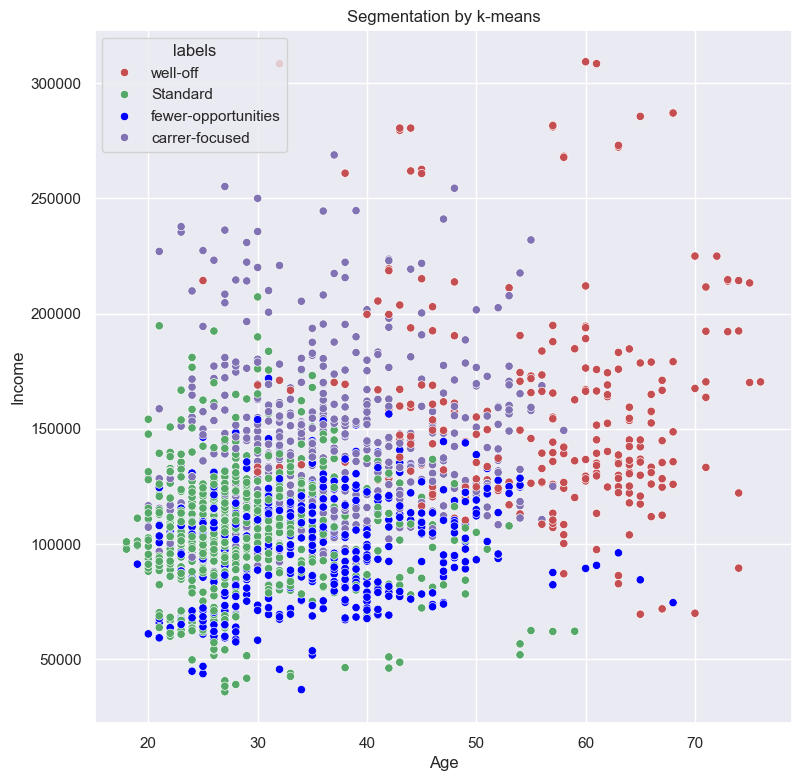

In [29]:
plt.figure(figsize = (9,9))
x_a=seg_data_kmeans.iloc[:,2]
y_a=seg_data_kmeans.iloc[:,4]
sns.scatterplot(x=x_a,y=y_a,hue = seg_data_kmeans['labels'],palette = ['r','g','blue','m'])
plt.title('Segmentation by k-means')
plt.savefig("Segmentation by k-means", facecolor='#E6E6FA', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

Here,k-means clustering alone cannot clearly divide the population in different segments .So we will use dimensional redution techinques to improve the results.

## Principal component analysis(PCA)

In [30]:
pca = PCA()

In [31]:
pca.fit(seg_data_standard)

PCA()

In [32]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

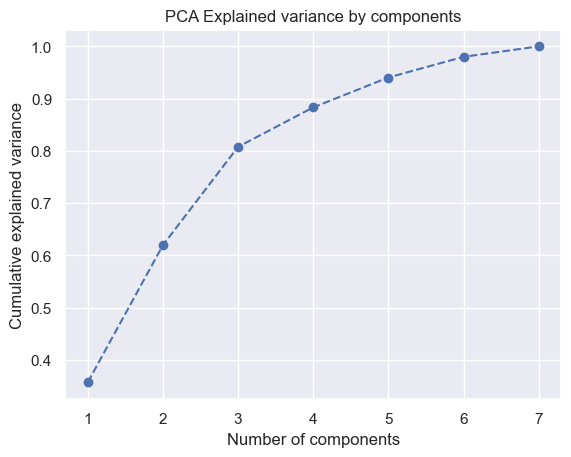

In [33]:
#plt.figure()
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA Explained variance by components')
plt.savefig("PCA Explained variance by components", facecolor='#E6E6FA', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

In [34]:
pca = PCA(n_components = 3)

In [35]:
pca.fit(seg_data_standard)

PCA(n_components=3)

In [36]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114])

In [37]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [38]:
pca_comp = pd.DataFrame(data =pca.components_ ,
                         columns = seg_data.columns.values ,
                         index = ['Component 1','Component 2','Component 3'])
pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


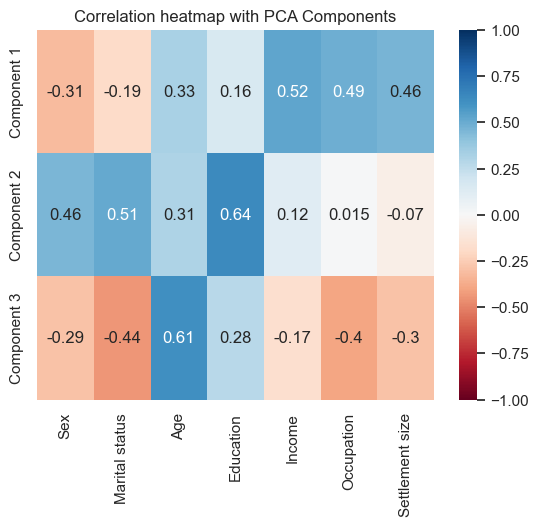

In [39]:
sns.heatmap(pca_comp,vmin = -1,vmax = 1,cmap = 'RdBu',annot = True)
plt.title('Correlation heatmap with PCA Components')
plt.savefig("correlation_heatmap.png", facecolor='#E6E6FA', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

From heatmap : Component1 - carrier , Component2 - education and lifestyle , Component3 - experience

In [40]:
scores_pca = pca.transform(seg_data_standard)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [41]:
scores_pca.shape

(2000, 3)

In [42]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=32)
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)

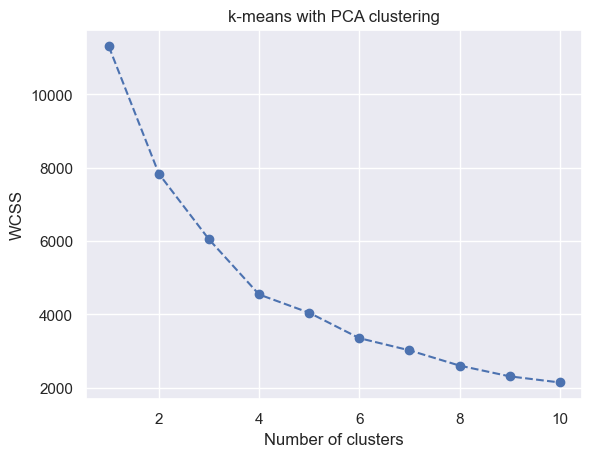

In [43]:
plt.plot(range (1,11),wcss,marker = 'o',linestyle = '--')
plt.title('k-means with PCA clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig("k-means with PCA clustering", facecolor='#E6E6FA', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

In [44]:
kmeans_pca = KMeans(n_clusters = 4,init='k-means++',random_state = 32)

In [45]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=32)

### K-means clustering with PCA Results

From 'Correlation heatmap with PCA Components',we have deduced representation of component1, component2 and component3.

Component1 - carrier , Component2 - education and lifestyle , Component3 - experience.

In [46]:
seg_pca_kmeans = pd.concat([seg_data,pd.DataFrame(scores_pca)],axis = 1)
#seg_pca_kmeans.drop('index',axis =1,inplace = True)
seg_pca_kmeans.columns.values[-3:] = ['Component 1 - Carrier','Component 2 - Education and Lifestyle','Component 3 - Experience']
seg_pca_kmeans['segments k-means pca']=kmeans_pca.labels_
seg_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1 - Carrier,Component 2 - Education and Lifestyle,Component 3 - Experience,segments k-means pca
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,1
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,2
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,2
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,1
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,1


In [47]:
seg_pca_kmeans_analysis = seg_pca_kmeans.groupby(['segments k-means pca']).mean()
seg_pca_kmeans_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1 - Carrier,Component 2 - Education and Lifestyle,Component 3 - Experience
segments k-means pca,,,,,,,,,,
0,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
1,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
2,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [48]:
seg_pca_kmeans_analysis['N_obs'] = seg_pca_kmeans[['segments k-means pca','Sex']].groupby(['segments k-means pca']).count()
seg_pca_kmeans_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1 - Carrier,Component 2 - Education and Lifestyle,Component 3 - Experience,N_obs
segments k-means pca,,,,,,,,,,,
0,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460
1,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692
2,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265


In [49]:
seg_pca_kmeans_analysis['Prop_obs'] = seg_pca_kmeans_analysis['N_obs']/seg_pca_kmeans_analysis['N_obs'].sum()
seg_pca_kmeans_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1 - Carrier,Component 2 - Education and Lifestyle,Component 3 - Experience,N_obs,Prop_obs
segments k-means pca,,,,,,,,,,,,
0,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
1,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
2,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


From 'Correlation heatmap with PCA Components',we have deduced representation of component1, component2 and component3.
Component1 - carrier , Component2 - education and lifestyle , Component3 - experience.
Now, we will label segments based on propotion of each component.

In [50]:
seg_pca_kmeans_analysis = seg_pca_kmeans_analysis.rename({ 0: 'fewer opportunities',
                                                           1:  'standard',
                                                           2:  'carrier-focused',
                                                           3:  'well-off'
    
})
seg_pca_kmeans_analysis.to_csv('pca_kmeans_segment_analysis.csv')
seg_pca_kmeans_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1 - Carrier,Component 2 - Education and Lifestyle,Component 3 - Experience,N_obs,Prop_obs
segments k-means pca,,,,,,,,,,,,
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
carrier-focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [51]:
seg_pca_kmeans['labels'] = seg_pca_kmeans['segments k-means pca'].map({ 0: 'fewer opportunities',
                                                           1:  'standard',
                                                           2:  'carrier-focused',
                                                           3:  'well-off'    
})

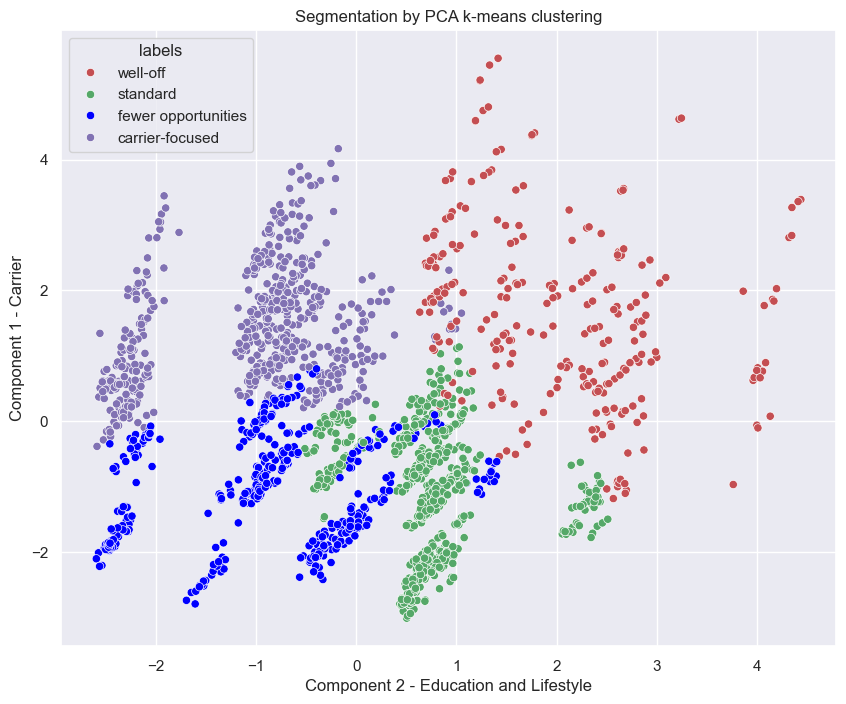

In [52]:
plt.figure(figsize = (10,8))
sns.scatterplot(x=seg_pca_kmeans['Component 2 - Education and Lifestyle'] ,y=seg_pca_kmeans['Component 1 - Carrier'] ,
                hue=seg_pca_kmeans['labels'] ,palette=['r','g','blue','m'])
plt.title('Segmentation by PCA k-means clustering')
plt.savefig("Segmentation by PCA k-means clustering", facecolor='#E6E6FA', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

## Data export

In [53]:
pickle.dump(scaler,open('scaler.pickle','wb'))

In [54]:
pickle.dump(pca,open('pca.pickle','wb'))

In [55]:
pickle.dump(kmeans_pca,open('kmeans_pca.pickle','wb'))